In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import dataset
dataset = pd.read_csv('student_details.csv')

#separate two column
X = dataset.iloc[:, 1:5].values
Y = dataset.iloc[:, 5].values

In [3]:
#make data frame
X = pd.DataFrame(X)
y = pd.DataFrame(Y)

In [4]:
#import lable encoder library
from sklearn.preprocessing import LabelEncoder 
labelencoder = LabelEncoder()
X.values[:, 0] = labelencoder.fit_transform(X.values[:, 0])
X.values[:, 1] = labelencoder.fit_transform(X.values[:, 1])
X.values[:, 2] = labelencoder.fit_transform(X.values[:, 2])
X.values[:, 3] = labelencoder.fit_transform(X.values[:, 3])
y.values[:, 0] = labelencoder.fit_transform(y.values[:, 0])

In [5]:
#import model split libaray
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 125)

In [6]:
X_train=X_train.astype(int)
y_train=y_train.astype(int)
X_test=X_test.astype(int)
y_test=y_test.astype(int)

In [7]:
#import decisionTree Alogorith Libaray
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
#import library for sklern
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n {}".format(cm))

Confusion Matrix : 
 [[1 0]
 [1 2]]


In [10]:
#print accuracy
print("Accuracy Score: {} %".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy Score: 75.0 %


In [11]:
#import Graph Library
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

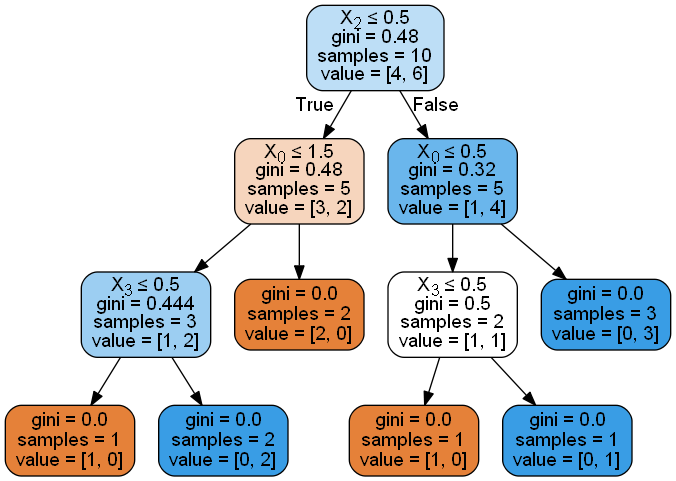

In [12]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('computer.png')
Image(graph.create_png())